In [1]:
!pip install --upgrade --no-cache-dir causaldag

Requirement already up-to-date: causaldag in /Users/chandlersquires/Documents/causaldag (0.1a30)


In [2]:
import causaldag as cd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy.stats import norm, multivariate_normal
np.random.seed(1728)

In [3]:
def bernoulli(p):
    return np.random.binomial(1, p)

def RAND_RANGE():
    return np.random.uniform(.25, 1) * (-1 if bernoulli(.5) else 1)

In [4]:
nnodes = 11
nodes = list(range(nnodes))
d = cd.rand.directed_erdos(nnodes, .5)
g = cd.GaussDAG(nodes=nodes, arcs={(i, j): RAND_RANGE() for i, j in d.arcs})

In [5]:
g.arc_weights

{(0, 3): -0.5792050294473732,
 (0, 5): 0.6580311675454829,
 (0, 6): 0.42231296755019543,
 (0, 9): -0.3624932670504001,
 (0, 10): 0.4250932985571496,
 (1, 2): -0.7351766572409122,
 (1, 4): -0.27465669942750914,
 (1, 5): 0.7445478260557209,
 (1, 6): 0.9741468661836032,
 (1, 9): 0.5745953930860317,
 (2, 5): -0.3578065021604247,
 (2, 6): -0.836963372524639,
 (2, 9): 0.9209783864775859,
 (3, 4): -0.9451320381259674,
 (3, 5): 0.8016889501578832,
 (3, 6): -0.8732426327729317,
 (3, 7): -0.9493131815660968,
 (4, 8): -0.5523961174130928,
 (4, 9): 0.6111526196329374,
 (4, 10): -0.45456341523086397,
 (5, 6): -0.8136006019855235,
 (6, 7): -0.5378467762887504,
 (6, 8): -0.9601328498431583,
 (7, 8): 0.5243461265556105,
 (8, 10): 0.8680262323442807,
 (9, 10): 0.6455560223775664}

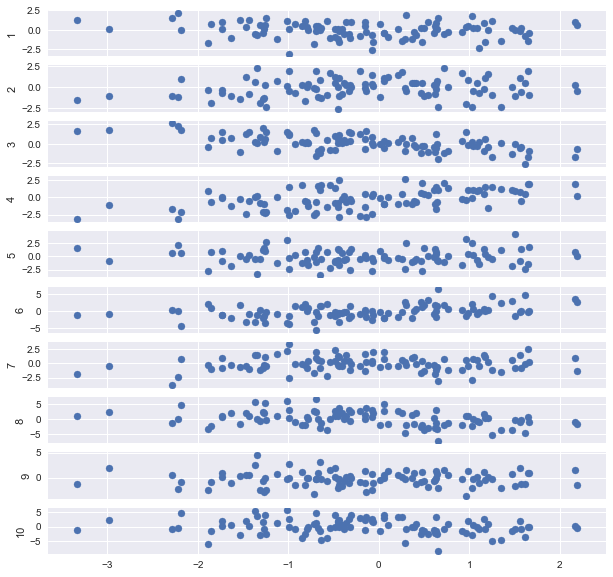

In [6]:
samples = g.sample(100)
fig, axes = plt.subplots(nnodes-1, sharex=True)
fig.set_size_inches(10, 10)
for i, ax in zip(range(1, nnodes), axes):
    ax.scatter(samples[:,0], samples[:,i])
    ax.set_ylabel(i)

In [7]:
IV_STRENGTH = 2
intervention_set = list(range(nnodes))
interventions = [
    cd.BinaryIntervention(
        intervention1=cd.ConstantIntervention(val=-IV_STRENGTH*std),
        intervention2=cd.ConstantIntervention(val=IV_STRENGTH*std)
    ) for std in np.diag(g.covariance)**.5
]

In [8]:
interventions

[BinaryIntervention(intervention1=ConstantIntervention(val=-2.0), intervention2=ConstantIntervention(val=2.0), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-2.0), intervention2=ConstantIntervention(val=2.0), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-2.482325294841046), intervention2=ConstantIntervention(val=2.482325294841046), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-2.3112580696556866), intervention2=ConstantIntervention(val=2.3112580696556866), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-3.0122318997348727), intervention2=ConstantIntervention(val=3.0122318997348727), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-3.360655545896748), intervention2=ConstantIntervention(val=3.360655545896748), p=0.5),
 BinaryIntervention(intervention1=ConstantIntervention(val=-4.678948990612857), intervention2=ConstantIntervention(val=4.678948990612857), p=0.5),
 BinaryIntervention(int

In [9]:
samples[:,4].std()*2

2.8126610211375676

In [10]:
g.logpdf(samples)

array([-16.40534265, -13.6322136 , -13.82182794, -14.29888635,
       -17.90822904, -13.39154551, -13.44232649, -13.77114924,
       -19.44048954, -16.93252656, -20.35146736, -15.14841555,
       -14.12790308, -12.36735904, -13.64974152, -12.4070037 ,
       -12.39007908, -18.40597628, -13.22686181, -19.53942168,
       -16.20080726, -12.90417753, -13.52080796, -17.6995578 ,
       -12.60784048, -18.1367484 , -15.62367871, -12.9899915 ,
       -18.22636961, -12.50409766, -15.62541784, -14.90365733,
       -13.75586762, -14.56390788, -17.96267116, -18.65782377,
       -19.59790753, -16.71892945, -14.97875894, -13.7745526 ,
       -14.85743609, -14.57267443, -12.30483559, -15.19309186,
       -15.56330861, -16.19669894, -16.4319969 , -15.6550375 ,
       -13.33284615, -12.26630874, -13.76572227, -17.18547604,
       -15.29717924, -14.56742329, -13.89936705, -15.31363057,
       -20.30562241, -13.54739345, -19.61129999, -18.87899362,
       -15.01860583, -17.65043052, -15.60312345, -16.31

In [11]:
iv_samples = [g.sample_interventional({iv_node: iv}, 100) for iv_node, iv in zip(intervention_set, interventions)]

In [12]:
iv_logpdfs = np.array([
    g.logpdf(iv_samp, interventions={iv_node: iv}) 
    for iv_samp, iv_node, iv in zip(iv_samples, intervention_set, interventions)
])

In [13]:
iv_logpdfs.mean(axis=1)

array([-14.91692219, -15.11382084, -14.93007546, -14.899853  ,
       -14.76934108, -14.98989587, -15.05659125, -15.4116505 ,
       -14.85183621, -15.02823097, -14.84604824])

In [14]:
cpdag = d.cpdag()
dags = [cd.DAG(nodes=set(nodes), arcs=arcs) for arcs in cpdag.all_dags()]
node_orders = [dag.topological_sort() for dag in dags]
equiv_gdags = [cd.GaussDAG.from_precision(g.precision, node_order) for node_order in node_orders]

In [15]:
covs = [gdag.covariance for gdag in equiv_gdags]
precs = [gdag.precision for gdag in equiv_gdags]
for cov, prec in zip(covs, precs):
    print(np.allclose(np.linalg.inv(prec), cov))


True
True
True
True
True
True
True
True


In [24]:
logpdfs_by_dag

array([[-16.40534265, -13.6322136 , -13.82182794, -14.29888635,
        -17.90822904, -13.39154551, -13.44232649, -13.77114924,
        -19.44048954, -16.93252656, -20.35146736, -15.14841555,
        -14.12790308, -12.36735904, -13.64974152, -12.4070037 ,
        -12.39007908, -18.40597628, -13.22686181, -19.53942168,
        -16.20080726, -12.90417753, -13.52080796, -17.6995578 ,
        -12.60784048, -18.1367484 , -15.62367871, -12.9899915 ,
        -18.22636961, -12.50409766, -15.62541784, -14.90365733,
        -13.75586762, -14.56390788, -17.96267116, -18.65782377,
        -19.59790753, -16.71892945, -14.97875894, -13.7745526 ,
        -14.85743609, -14.57267443, -12.30483559, -15.19309186,
        -15.56330861, -16.19669894, -16.4319969 , -15.6550375 ,
        -13.33284615, -12.26630874, -13.76572227, -17.18547604,
        -15.29717924, -14.56742329, -13.89936705, -15.31363057,
        -20.30562241, -13.54739345, -19.61129999, -18.87899362,
        -15.01860583, -17.65043052, -15.

In [25]:
logpdfs2_by_dag

array([[-16.40534265, -13.6322136 , -13.82182794, -14.29888635,
        -17.90822904, -13.39154551, -13.44232649, -13.77114924,
        -19.44048954, -16.93252656, -20.35146736, -15.14841555,
        -14.12790308, -12.36735904, -13.64974152, -12.4070037 ,
        -12.39007908, -18.40597628, -13.22686181, -19.53942168,
        -16.20080726, -12.90417753, -13.52080796, -17.6995578 ,
        -12.60784048, -18.1367484 , -15.62367871, -12.9899915 ,
        -18.22636961, -12.50409766, -15.62541784, -14.90365733,
        -13.75586762, -14.56390788, -17.96267116, -18.65782377,
        -19.59790753, -16.71892945, -14.97875894, -13.7745526 ,
        -14.85743609, -14.57267443, -12.30483559, -15.19309186,
        -15.56330861, -16.19669894, -16.4319969 , -15.6550375 ,
        -13.33284615, -12.26630874, -13.76572227, -17.18547604,
        -15.29717924, -14.56742329, -13.89936705, -15.31363057,
        -20.30562241, -13.54739345, -19.61129999, -18.87899362,
        -15.01860583, -17.65043052, -15.

In [19]:
for lpdf in logpdfs_by_dag:
    print(np.allclose(logpdfs_by_dag[0], lpdf))

True
True
True
True
True
True
True
True


In [20]:
for gdag in equiv_gdags:
    print(gdag.variances)

[1.         0.64914633 1.54048472 1.         1.         0.60170429
 1.66194594 1.         1.         1.         1.        ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.7487953  1.         1.         1.33547847 1.         0.60170429
 1.66194594 1.         1.         1.         1.        ]
[0.7487953  0.64914633 1.54048472 1.33547847 1.         1.
 1.         1.         1.         1.         1.        ]
[1.         0.64914633 1.54048472 1.         1.         1.
 1.         1.         1.         1.         1.        ]
[1.         1.         1.         1.         1.         0.60170429
 1.66194594 1.         1.         1.         1.        ]
[0.7487953  1.         1.         1.33547847 1.         1.
 1.         1.         1.         1.         1.        ]
[0.7487953  0.64914633 1.54048472 1.33547847 1.         0.60170429
 1.66194594 1.         1.         1.         1.        ]
